## Fresnel reflection and transmission at an interface


In [2]:
import cmath 
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp


wavelength = 633.0
n1 = 1.5
n2 = 1.0

## Fresnel coefficients

For a given incident angle, we compute the wavevectors in both media, the in-plane wavevector, the complex reflection and transmission coefficients for p and s polarisations, and return the intensity coefficients.

In [3]:

def fresnel(theta):
    
    k0 = 2*np.pi/wavelength
    k1 = n1 * k0
    k2 = n2 * k0
    
    k_x = k1 * cmath.sin(theta)
    
    k1_z = np.sqrt(k1**2 - k_x**2)
    k2_z = np.sqrt(k2**2 - k_x**2)
    
    eps1 = n1**2
    eps2 = n2**2
    
    ap = k1_z / eps1
    bp = k2_z / eps2
    rp = (ap - bp) / (ap + bp)
    tp = 2 * ap / (ap + bp)
    
    rs = (k1_z - k2_z) / (k1_z + k2_z)
    ts = 2 * k1_z / (k1_z + k2_z)
    
    Rs = abs(rs)**2
    Rp = abs(rp)**2
    Ts = abs(ts)**2 * np.real(k2_z/k1_z)
    Tp = 1 - Rp
    
    return(Rp,Rs,Tp,Ts)
  

## Loop over incident angle

We create a vector of incident angles from 0 to pi/2 (excluding exact normal incidence as the denominators blow up), and call the function defined above.

In [4]:
Ntheta = 180
atheta = np.linspace(0.001, np.pi/2-0.001, Ntheta)
arp = np.zeros(Ntheta)
ars = np.zeros(Ntheta)
atp = np.zeros(Ntheta)
ats = np.zeros(Ntheta)

for it in range(Ntheta):
    rp,rs,tp,ts = fresnel(atheta[it])
    arp[it] = rp; ars[it] = rs; atp[it] = tp; ats[it] = ts; 


## Plotting



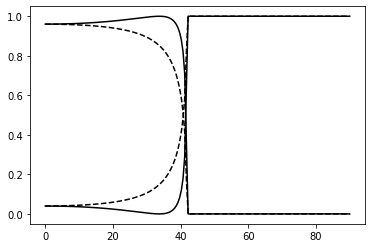

In [5]:
atheta_deg = atheta * 180/np.pi

plt.figure()
plt.plot(atheta_deg, arp, '-k')
plt.plot(atheta_deg, ars,'--k')
plt.plot(atheta_deg, atp, '-k')
plt.plot(atheta_deg, ats, '--k')
plt.show()


We note the following features:
 
- p-polarisation has a minimum in reflectivity (Brewster angle)
- both polarisations yield complete reflection above ~42 degrees (total internal reflection), where the complex amplitude reflection coefficient becomes purely imaginary
- reflection at normal incidence is the same for both polarisations (as it must be, since they're both equivalent when the plane of incidence cannot be defined)

_Download this page [as a Jupyter notebook](https://github.com/vuw-scps/python-physics/raw/master/notebooks/phys415/fresnel.ipynb) or as a [standalone Python script](https://github.com/vuw-scps/python-physics/raw/master/scripts/phys415/fresnel.py)._